#### Read ground truth

In [19]:
import os
from PIL import Image

import torch


def read_gt(gt_pth):
    
    traj = os.listdir(gt_pth)
    
    traj_gt = torch.Tensor()
    
    for idx in range(len(traj)):

        gt_f = f"{gt_pth}/{traj[idx]}"
        gt_fp = open(gt_f, "r", encoding="utf-8")
        gt_data = gt_fp.readline()
        gt_data = gt_data.replace("\n", "").split(",")
        gt_data = [
            round(float(gt_data[0]), 4),
            round(float(gt_data[1]), 4),
            round(float(gt_data[2]), 4)
        ]
        pos_gt = torch.Tensor(gt_data).unsqueeze(0)    
        traj_gt = torch.concat((traj_gt, pos_gt), dim=0)
    

    return traj_gt

In [20]:
import os


test_gt_pth = f"e:\Workspace\Datasets\iGibson-dataset\iGibson-pano-data\Ihlen_0_int/1/0/gt/"

print(f"Ground truth tensor")
test_gt = read_gt(test_gt_pth)
print(test_gt)

print("*" * 150)

print(f"Ground truth raw data")
traj = os.listdir(test_gt_pth)
for idx in range(len(traj)):
    gt_pth_item = f"{test_gt_pth}/{traj[idx]}"
    test_gt_txt = open(gt_pth_item, "r", encoding="utf-8").readlines()
    print(test_gt_txt[0])
    
print("*" * 150)
    
test_gt_pth = f"E:/Workspace/Datasets/iGibson-dataset/iGibson-traj-data/Beechwood_1_int/1/2/gt"

print(f"Ground truth tensor")
test_gt = read_gt(test_gt_pth)
print(test_gt)

print("*" * 150)

print(f"Ground truth raw data")
traj = os.listdir(test_gt_pth)
for idx in range(len(traj)):
    gt_pth_item = f"{test_gt_pth}/{traj[idx]}"
    test_gt_txt = open(gt_pth_item, "r", encoding="utf-8").readlines()
    print(test_gt_txt[0])

Ground truth tensor
tensor([[-3.9979,  8.4244,  1.0000]])
******************************************************************************************************************************************************
Ground truth raw data
-3.9978556701025356,8.424412371132847,1.0
******************************************************************************************************************************************************
Ground truth tensor
tensor([[-4.3977, -3.0595,  1.0000],
        [-4.5482, -3.1050,  1.0000],
        [-4.6908, -3.1561,  1.0000],
        [-4.8334, -3.2072,  1.0000],
        [-4.9760, -3.2583,  1.0000]])
******************************************************************************************************************************************************
Ground truth raw data
-4.397698684934512,-3.059516322904957,1.0
-4.548203490846536,-3.1050446998718537,1.0
-4.690817369092579,-3.156130268198794,1.0
-4.833431247338622,-3.207215836525735,1.0
-4.976045125584664,-3.258301

#### Read rgb image

In [30]:
import os
import numpy as np
from PIL import Image

import torch


def read_rgb(obs_pth):
    
    traj = os.listdir(obs_pth)
    
    obs = torch.Tensor()
    
    for idx in range(int(len(traj) / 8)):

        pos_obs = torch.Tensor()
        
        for d in range(8):
            
            obs_item = f"{obs_pth}/{str(idx).zfill(4)}_{d}.jpg"
            obs_image = (Image.open(obs_item).convert("RGB")).resize((224, 224))
            obs_ts = torch.Tensor(np.array(obs_image)).permute(2, 0, 1)
            obs_ts = obs_ts.unsqueeze(0)

            pos_obs = torch.concat((pos_obs, obs_ts))

        pos_obs = pos_obs.unsqueeze(0)
        obs = torch.concat((obs, pos_obs))

    
    return obs

Observation tensor
torch.Size([5, 8, 3, 224, 224])
******************************************************************************************************************************************************


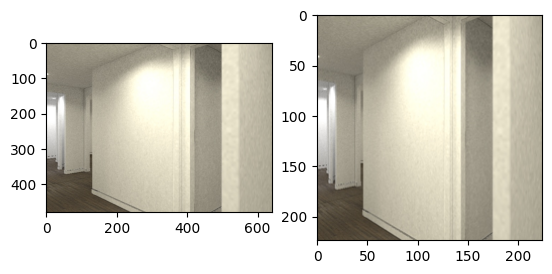

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

from torchvision import transforms

test_obs_pth = f"e:\Workspace\Datasets\iGibson-dataset/iGibson-traj-data/Beechwood_1_int/2/1/rgb/"
print(f"Observation tensor")
test_obs = read_rgb(test_obs_pth)
print(test_obs.shape)

print("*" * 150)

test_obs_pth = "e:\Workspace\Datasets\iGibson-dataset\iGibson-pano-data\Beechwood_1_int/1/1/rgb/0001_1.jpg"
test_obs_raw = Image.open(test_obs_pth).convert("RGB")
test_obs_aug = (Image.open(test_obs_pth).convert("RGB")).resize((224, 224))
plt.subplot(1, 2, 1)
plt.imshow(test_obs_raw)
plt.subplot(1, 2, 2)
plt.imshow(test_obs_aug)

plt.show()
plt.close("all")


#### Read depth image

In [6]:
import os
import numpy as np
from PIL import Image

import torch


def read_depth(obs_pth):
    
    traj = os.listdir(obs_pth)
    
    obs = torch.Tensor()
    
    for idx in range(int(len(traj) / 8)):

        pos_obs = torch.Tensor()
        
        for d in range(8):
            
            obs_item = f"{obs_pth}/{str(idx).zfill(4)}_{d}.jpg"
            obs_image = (Image.open(obs_item).convert("L")).resize((224, 224))
            obs_ts = torch.Tensor(np.array(obs_image)).unsqueeze(0).repeat(3, 1, 1)
            obs_ts = obs_ts.unsqueeze(0)

            pos_obs = torch.concat((pos_obs, obs_ts))

        pos_obs = pos_obs.unsqueeze(0)
        obs = torch.concat((obs, pos_obs))

    
    return obs

Observation tensor
torch.Size([8, 3, 224, 224])
******************************************************************************************************************************************************


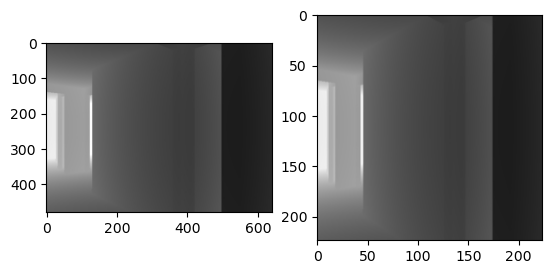

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

from torchvision import transforms

test_obs_pth = f"e:\Workspace\Datasets\iGibson-dataset/iGibson-pano-data/Beechwood_1_int/2/1/d/"
print(f"Observation tensor")
test_obs = read_depth(test_obs_pth)
print(test_obs.shape)

print("*" * 150)

test_obs_pth = "e:\Workspace\Datasets\iGibson-dataset\iGibson-pano-data\Beechwood_1_int/1/1/d/0000_1.jpg"
test_obs_raw = Image.open(test_obs_pth).convert("RGB")
test_obs_aug = (Image.open(test_obs_pth).convert("RGB")).resize((224, 224))
plt.subplot(1, 2, 1)
plt.imshow(test_obs_raw)
plt.subplot(1, 2, 2)
plt.imshow(test_obs_aug)

plt.show()
plt.close("all")

#### Read map

In [4]:
import torch


def read_mp(mp_pth):
    
    # Read map data
    mp_fp = open(mp_pth, "r", encoding="utf-8")
    mp_data = mp_fp.readlines()
    mp_data = [
        (i.replace("\n", "")).split(",") for i in mp_data
    ]
    mp_fp.close()
    
    for idx in range(len(mp_data)):
        mp_data[idx] = [
            round(float(mp_data[idx][0]), 4),
            round(float(mp_data[idx][1]), 4),
            round(float(mp_data[idx][2]), 4),
            round(float(mp_data[idx][3]), 4),
        ]
    
    mp_data = torch.Tensor(mp_data)
    
    # Add Gaussian noise
    mean = 0
    std = 0.03
    mp_noise = torch.randn(mp_data.shape) * std + mean
    mp_data = mp_data + mp_noise
    
    # Adjust the map tensor length    
    mp_len = len(mp_data)
    mp_dim = len(mp_data[0])
    
    ad_mp_len = 20
    
    mp_mask_1 = torch.ones(mp_len)
    
    if mp_len < ad_mp_len:
        ad_mp_data = torch.zeros((ad_mp_len - mp_len, mp_dim))    
        mp_data = torch.concat((mp_data, ad_mp_data))

        mp_mask_2 = torch.zeros(ad_mp_len - mp_len)    
        mp_mask = torch.concat((mp_mask_1, mp_mask_2))
    
    
    return mp_data, mp_mask

In [5]:
test_mp_pth = f"e:/Workspace/Datasets/iGibson-dataset/iGibson-area/Beechwood_1_int/0/wmap.txt"
print(f"Wall map tensor:")
test_mp, test_mask = read_mp(test_mp_pth)
print(test_mp)
print(test_mask)

print("*" * 150)

print(f"Wall map raw data:")
test_mp_txt = open(test_mp_pth, "r", encoding="utf-8").readlines()
for i in test_mp_txt:
    print(i, end="")

Wall map tensor:
tensor([[-0.3096, -5.9974,  4.1841,  0.0674],
        [-0.3144, -1.4565,  4.3079,  0.1003],
        [-2.3309, -4.6056,  0.0749,  4.4977],
        [ 1.7716, -3.9366,  0.0971,  4.9406],
        [ 1.4599, -3.8545,  0.6037,  1.7550],
        [-2.7954, -2.5302,  1.0150,  0.0677],
        [-2.4048, -1.4986,  0.0926,  0.2051],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000]])
tensor([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.

#### Project map to ego-coordinate

In [6]:
import torch


def projection(gt, mp):
    
    print(mp.shape)
    print(gt.shape)

#### Generate random deviation

In [ ]:
import random

import torch


def deviation(mp, mp_mask):
    
    # X axis
    x_min = -2.0
    x_max = 2.0
    x_dev = round(random.uniform(x_min, x_max), 4)
    
    # Y axis
    y_min = -2.0
    y_max = 2.0
    y_dev = round(random.uniform(y_min, y_max), 4)
    
    # Orientation

    # Use deviation value as supervision    
    gt = [x_dev, y_dev]
    gt = torch.Tensor(gt)

    # Use map with offset as query
    m_dev_1 = gt.unsqueeze(0).repeat(mp.shape[0], 1)
    m_dev_2 = torch.zeros((mp.shape[0], mp.shape[1] - gt.shape[0]))
    m_dev = torch.concat((m_dev_1, m_dev_2), dim=1)
    
    if mp_mask is not None:
        # mask filled map
        pass
    
    
    return gt, m_dev
    